In [55]:
import folium
from folium import plugins
import numpy as np
from matplotlib import pyplot as plt

In [7]:
from elasticsearch import Elasticsearch
from elasticsearch import helpers as eshelper
from elasticsearch_dsl import Search, Q

In [11]:
client = Elasticsearch(hosts='http://51.15.135.251:23489', )

In [13]:
analysis = [a for a in Search(using=client, index='analysis').scan()]

restaurant_analysis = {a.id: a for a in analysis}

In [43]:
lyon = [(r, restaurant_analysis.get(r.meta.id)) for r in Search(using=client, index='restaurants').query('match', city='Genève').scan() if restaurant_analysis.get(r.meta.id)]
len(lyon)

308

In [131]:
lat = []
lng = []
values = []
for r, analyse in lyon:
    print(r)
    try:
        print(analyse.total["Matières grasses"])
        lat.append(r.lat)
        lng.append(r.lng)
        values.append(analyse.total["Matières grasses"].quantity)
    except KeyError:
        pass

<Hit(restaurants/raw/AVnlsaY0zsoQRCleD2aA): {'name': 'Le Jardin', 'street': 'Rue Adhémar-Fabri 8-10', 'z...}>
<Hit(restaurants/raw/AVnlsaY0zsoQRCleD2aD): {'name': 'Le Lin Xiang', 'street': 'Rue du Port 7', 'zip': '...}>
{'quantity': 42.80114752907721, 'unit': 'g'}
<Hit(restaurants/raw/AVnlsaY0zsoQRCleD2ac): {'name': 'Le Perron', 'street': 'Rue du Perron 5', 'zip': '1...}>
{'quantity': 17.007455276265215, 'unit': 'g'}
<Hit(restaurants/raw/AVnlsaY0zsoQRCleD2ag): {'name': 'Le Philanthrope', 'street': 'Boulevard des Philoso...}>
{'quantity': 31.90294700004416, 'unit': 'g'}
<Hit(restaurants/raw/AVnlsaY0zsoQRCleD2a7): {'name': 'Le Sénat 1970', 'street': 'Rue Emile-Yung 1', 'zip...}>
{'quantity': 16.877776004728133, 'unit': 'g'}
<Hit(restaurants/raw/AVnlsaY0zsoQRCleD2a8): {'name': 'Le Sesflo', 'street': 'Route de Florissant 16', 'z...}>
{'quantity': 38.1323797057101, 'unit': 'g'}
<Hit(restaurants/raw/AVnlsaY0zsoQRCleD2bA): {'name': 'Le Sofra', 'street': 'Boulevard Carl-Vogt 31', 'zi...}>
{'qu

In [174]:
plt_values = np.array(values)

In [175]:
plt_values.max() - plt_values.min()

3406.7318748137104

In [176]:
plt_values = plt_values[np.abs(plt_values - plt_values.mean()) / plt_values.std() < 3]

In [177]:
plt_values.max() - plt_values.min()

117.58020515492207

In [178]:
plt_values = 1 * (plt_values - plt_values.min()) / (plt_values.max() - plt_values.min())

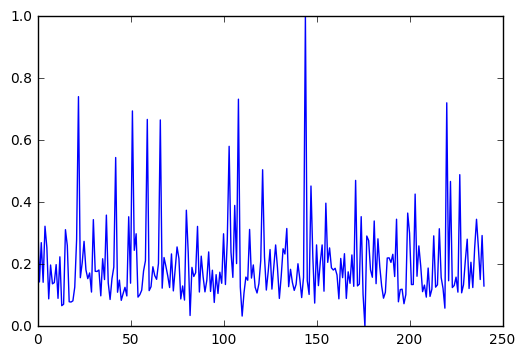

In [179]:
plt.plot(plt_values)
plt.show()

In [180]:
map_ = folium.Map(location=[46.599505, 3.480752], zoom_start=6)

In [181]:
plugins.HeatMap(zip(lat, lng, plt_values), radius = 20, max_val=1).add_to(map_)

In [182]:
map_.save('restaurants.html')